<a href="https://colab.research.google.com/github/Ingridlopes00/ingridlopes00/blob/main/Motos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Análise Estatística com Python
### Por: Ingrid Lopes

# Importação das bibliotecas necessárias


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np


# Carregar o arquivo CSV

In [2]:
arquivo_csv = "motos_detalhadas.csv"
dados = pd.read_csv(arquivo_csv)

In [3]:
dados.head()

,Estado,Ano,Marca,Modelo,Cor,Preço (R$),Quilometragem (Km),Potência (CV),Consumo (Km/L)
0,SC,2003,Suzuki,Sport,Azul,47731.77,118358,133,27.33
1,BA,2011,BMW,Custom,Cinza,9901.23,34521,106,21.44
2,GO,2011,Honda,Street,Verde,58257.96,97239,99,28.14
3,PR,2014,Yamaha,Sport,Preto,33792.70,26928,48,28.86
4,SC,2010,Ducati,Naked,Cinza,78207.84,18322,94,18.45


###Resumo Estatístico

In [4]:
dados.describe()

,Ano,Preço (R$),Quilometragem (Km),Potência (CV),Consumo (Km/L)
count,500.000000,500.00000,500.000000,500.000000,500.000000
mean,2008.968000,40417.76870,56153.898000,105.946000,20.362660
std,8.180515,22000.64835,34197.332212,54.901653,5.788067
min,1995.000000,3025.60000,155.000000,10.000000,10.010000
25%,2002.000000,20702.93250,26016.500000,58.000000,15.275000
50%,2009.000000,40445.60500,55816.500000,107.500000,20.845000
75%,2016.000000,60012.17000,85182.750000,155.000000,25.262500
max,2022.000000,79652.00000,119798.000000,199.000000,29.990000


###Informações gerais sobre os dados

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Estado              500 non-null    object 
 1   Ano                 500 non-null    int64  
 2   Marca               500 non-null    object 
 3   Modelo              500 non-null    object 
 4   Cor                 500 non-null    object 
 5   Preço (R$)          500 non-null    float64
 6   Quilometragem (Km)  500 non-null    int64  
 7   Potência (CV)       500 non-null    int64  
 8   Consumo (Km/L)      500 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 35.3+ KB


In [6]:
print(dados.columns)


Index(['Estado', 'Ano', 'Marca', 'Modelo', 'Cor', 'Preço (R$)',
       'Quilometragem (Km)', 'Potência (CV)', 'Consumo (Km/L)'],
      dtype='object')


#Verificando se há dados ausentes e tratando valores ausentes

In [7]:
print(dados.isnull().sum())

Estado                0
Ano                   0
Marca                 0
Modelo                0
Cor                   0
Preço (R$)            0
Quilometragem (Km)    0
Potência (CV)         0
Consumo (Km/L)        0
dtype: int64


In [8]:
dados['Preço (R$)'] = dados['Preço (R$)'].fillna(dados['Preço (R$)'].mean())
dados['Quilometragem (Km)'] = dados['Quilometragem (Km)'].fillna(dados['Quilometragem (Km)'].mean())

In [9]:
dados['Preço (R$)'] = pd.to_numeric(dados['Preço (R$)'], errors='coerce')
dados['Quilometragem (Km)'] = pd.to_numeric(dados['Quilometragem (Km)'], errors='coerce')

#Visualização da distribuição dos preços das motos

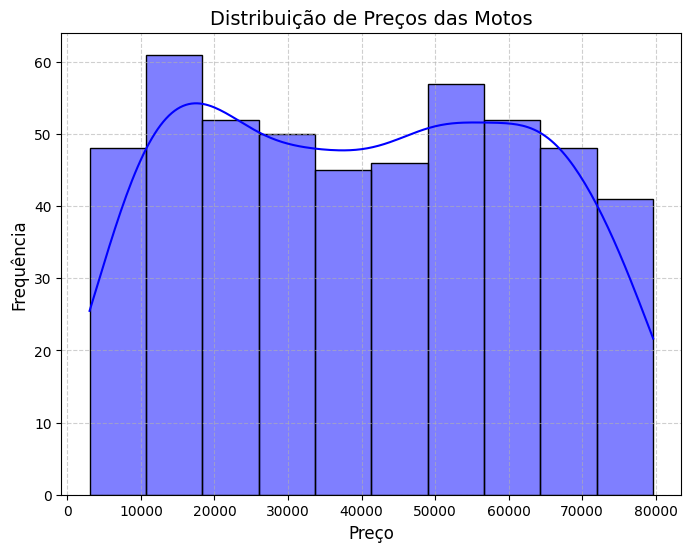

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(dados['Preço (R$)'], kde=True, color='blue')
plt.title("Distribuição de Preços das Motos", fontsize=14)
plt.xlabel("Preço", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


#Analisar a relação entre preço e quilometragem das motos

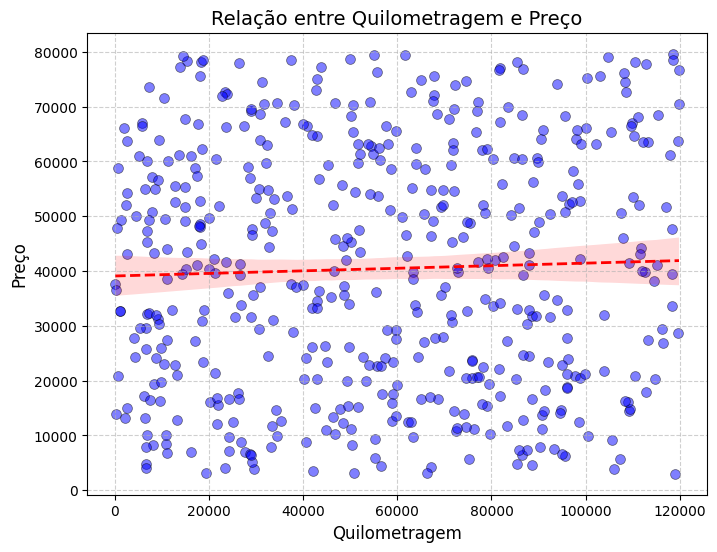

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dados['Quilometragem (Km)'], y=dados['Preço (R$)'], alpha=0.5, color='blue', s=50, edgecolor='k')
sns.regplot(x=dados['Quilometragem (Km)'], y=dados['Preço (R$)'], scatter=False, color='red', line_kws={'linewidth': 2, 'linestyle': '--'})
plt.title("Relação entre Quilometragem e Preço", fontsize=14)
plt.xlabel("Quilometragem", fontsize=12)
plt.ylabel("Preço", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


#Calculando a correlação entre as variáveis

In [12]:
correlacao = dados[['Preço (R$)', 'Quilometragem (Km)']].corr()
correlacao

,Preço (R$),Quilometragem (Km)
Preço (R$),1.0000,0.0364
Quilometragem (Km),0.0364,1.0000


# Visualizando a matriz de correlação

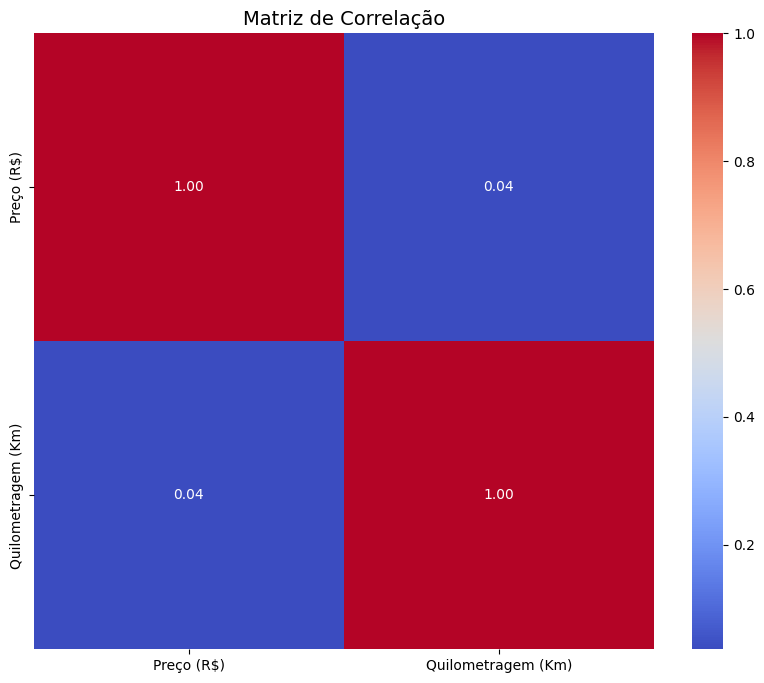

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação", fontsize=14)
plt.show()

# Comparando preços entre diferentes marcas


In [14]:
grupo1 = dados[dados['Marca'] == 'Honda']['Preço (R$)']
grupo2 = dados[dados['Marca'] == 'Yamaha']['Preço (R$)']

In [15]:
t_stat, p_value = stats.ttest_ind(grupo1, grupo2, equal_var=False)
print(f"\nTeste de Hipótese - Comparação de Preços Médios:")
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Rejeitamos a hipótese nula: Há diferença significativa entre os preços médios.")
else:
    print("Não rejeitamos a hipótese nula: Não há diferença significativa entre os preços médios.")


Teste de Hipótese - Comparação de Preços Médios:
T-statistic: 1.08, P-value: 0.2834
Não rejeitamos a hipótese nula: Não há diferença significativa entre os preços médios.


#Análises de Comparações entre Modelos de Motos

###Comparação de Preços Médios por Marca

In [16]:
preco_marca = dados.groupby('Marca')['Preço (R$)'].mean()

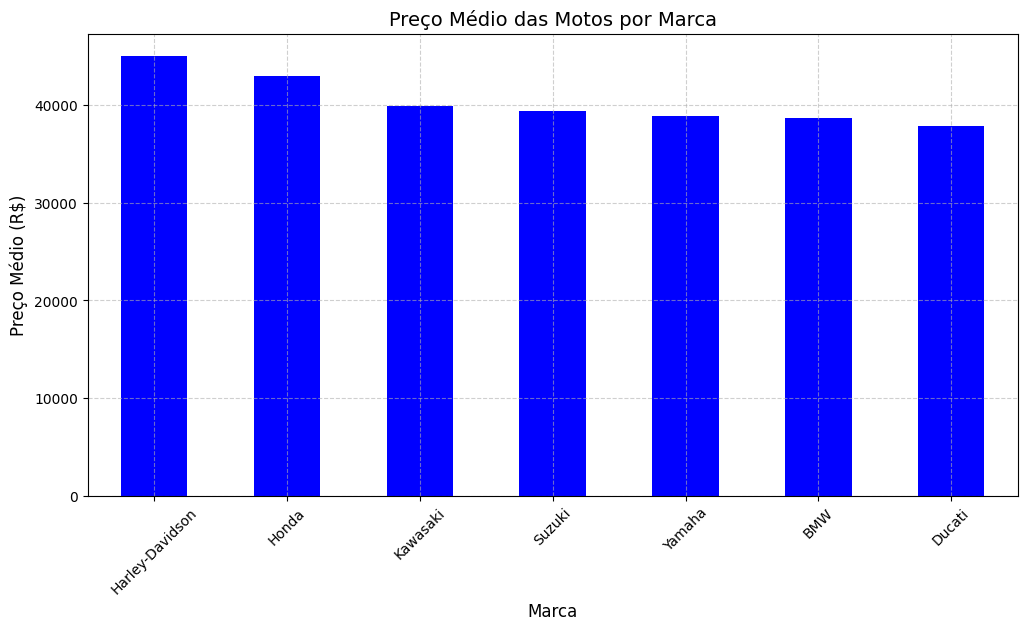

In [17]:
plt.figure(figsize=(12, 6))
preco_marca.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Preço Médio das Motos por Marca', fontsize=14)
plt.xlabel('Marca', fontsize=12)
plt.ylabel('Preço Médio (R$)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

###Comparação de Preços Médios por Modelo


In [18]:
preco_modelo = dados.groupby('Modelo')['Preço (R$)'].mean()

In [19]:
preco_modelo_top_10 = preco_modelo.sort_values(ascending=False).head(10)

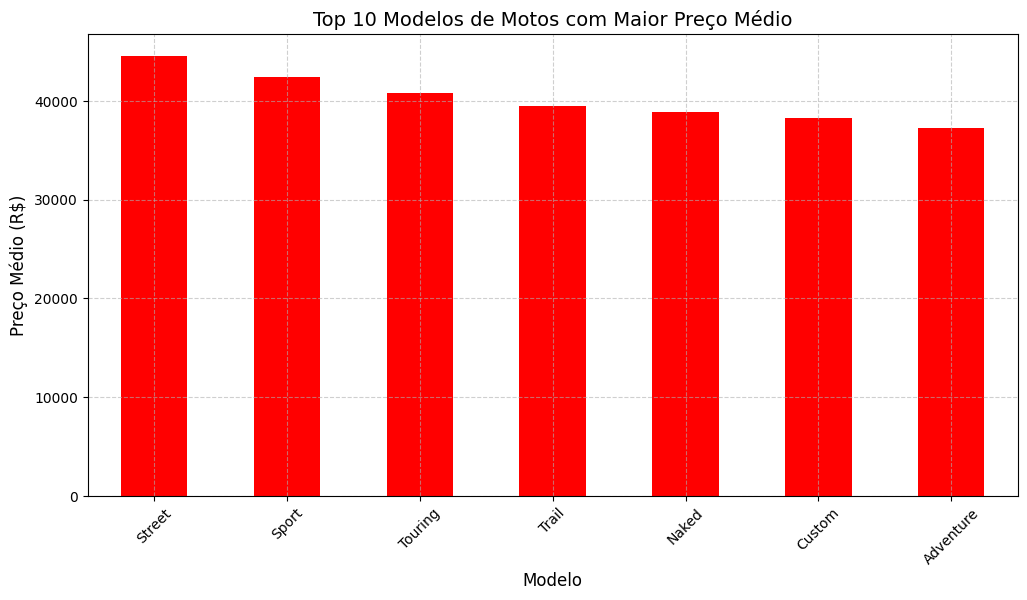

In [20]:
plt.figure(figsize=(12, 6))
preco_modelo_top_10.plot(kind='bar', color='red')
plt.title('Top 10 Modelos de Motos com Maior Preço Médio', fontsize=14)
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('Preço Médio (R$)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

###Marca x Modelo

<ipython-input-21-d0897ad9e85f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Marca', y='Preço (R$)', data=dados, palette=paleta)
<ipython-input-21-d0897ad9e85f>:3: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Marca', y='Preço (R$)', data=dados, palette=paleta)


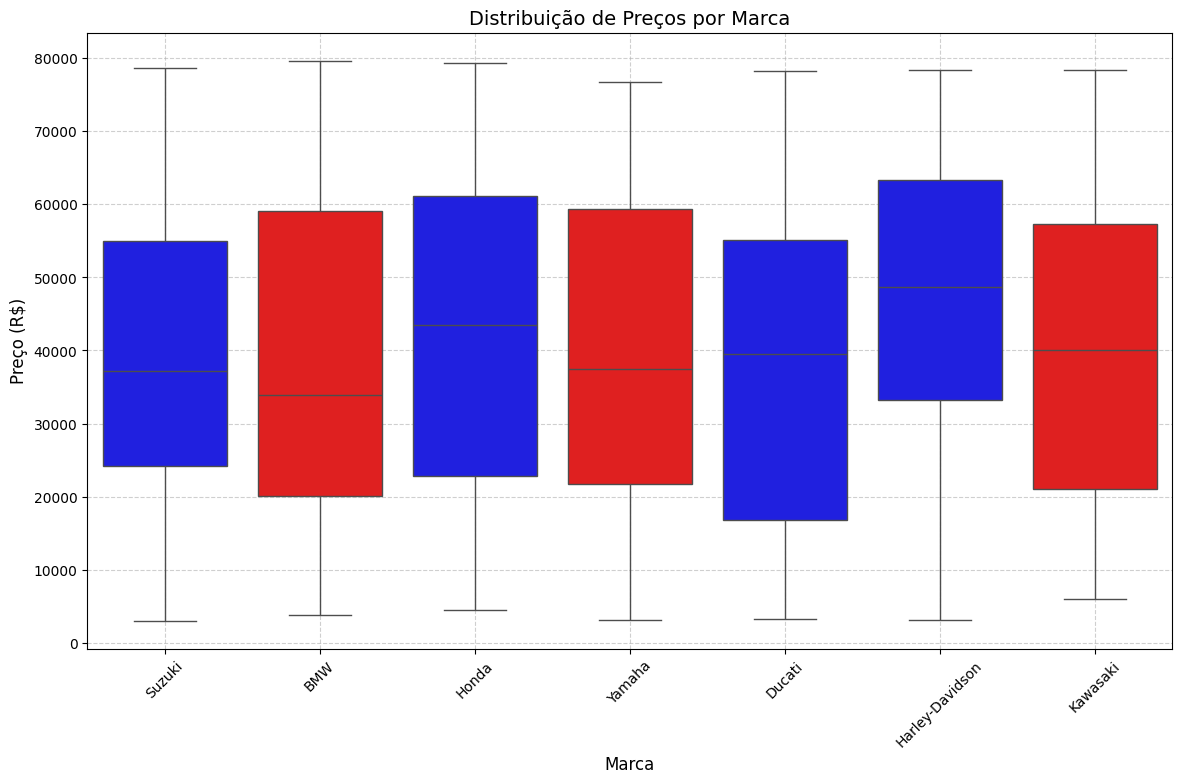

In [21]:
paleta = ['blue', 'red', 'blue', 'red', 'blue']
plt.figure(figsize=(14, 8))
sns.boxplot(x='Marca', y='Preço (R$)', data=dados, palette=paleta)
plt.title('Distribuição de Preços por Marca', fontsize=14)
plt.xlabel('Marca', fontsize=12)
plt.ylabel('Preço (R$)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

###Análisando o Desvios Padrão

In [22]:
desvio_preco_marca = dados.groupby('Marca')['Preço (R$)'].std()
desvio_preco_marca

,Preço (R$)
Marca,
BMW,22567.041724
Ducati,22481.925910
Harley-Davidson,21666.471957
Honda,23698.274184
Kawasaki,20945.141505
Suzuki,20509.999019
Yamaha,21777.340954


 # Top 5 Modelos Mais Caros e Mais Baratos

In [23]:
top_caros = dados[['Modelo', 'Preço (R$)']].sort_values(by='Preço (R$)', ascending=False).head(5)
top_baratos = dados[['Modelo', 'Preço (R$)']].sort_values(by='Preço (R$)').head(5)

print("\nTop 5 Modelos Mais Caros:")
print(top_caros)

print("\nTop 5 Modelos Mais Baratos:")
print(top_baratos)


Top 5 Modelos Mais Caros:
      Modelo  Preço (R$)
89    Street    79652.00
320   Street    79415.99
274    Sport    79352.31
432    Sport    79316.74
262  Touring    79097.20

Top 5 Modelos Mais Baratos:
        Modelo  Preço (R$)
177     Custom     3025.60
101      Sport     3095.22
390     Custom     3144.75
21       Sport     3198.97
460  Adventure     3541.25


# Distribuição de Preço por Estado

<ipython-input-24-1f3bbf7645ce>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Estado', y='Preço (R$)', data=dados, palette='coolwarm')


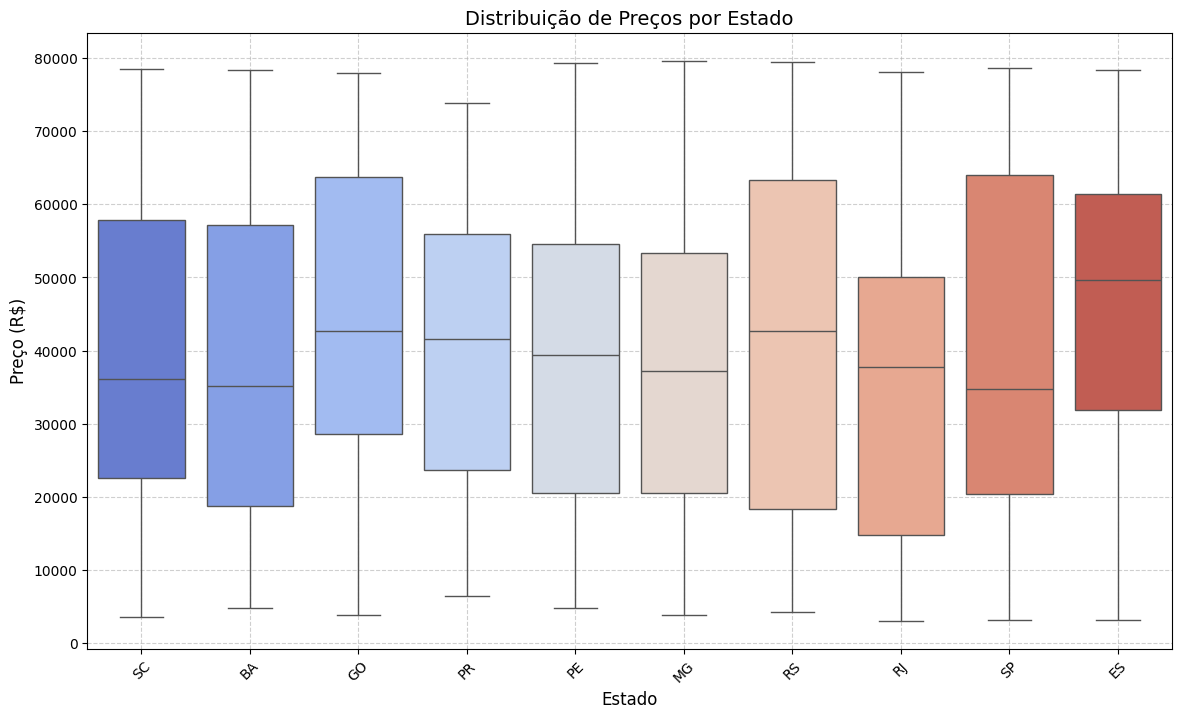

In [24]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Estado', y='Preço (R$)', data=dados, palette='coolwarm')
plt.title('Distribuição de Preços por Estado', fontsize=14)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Preço (R$)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#Relação entre Consumo e Preço

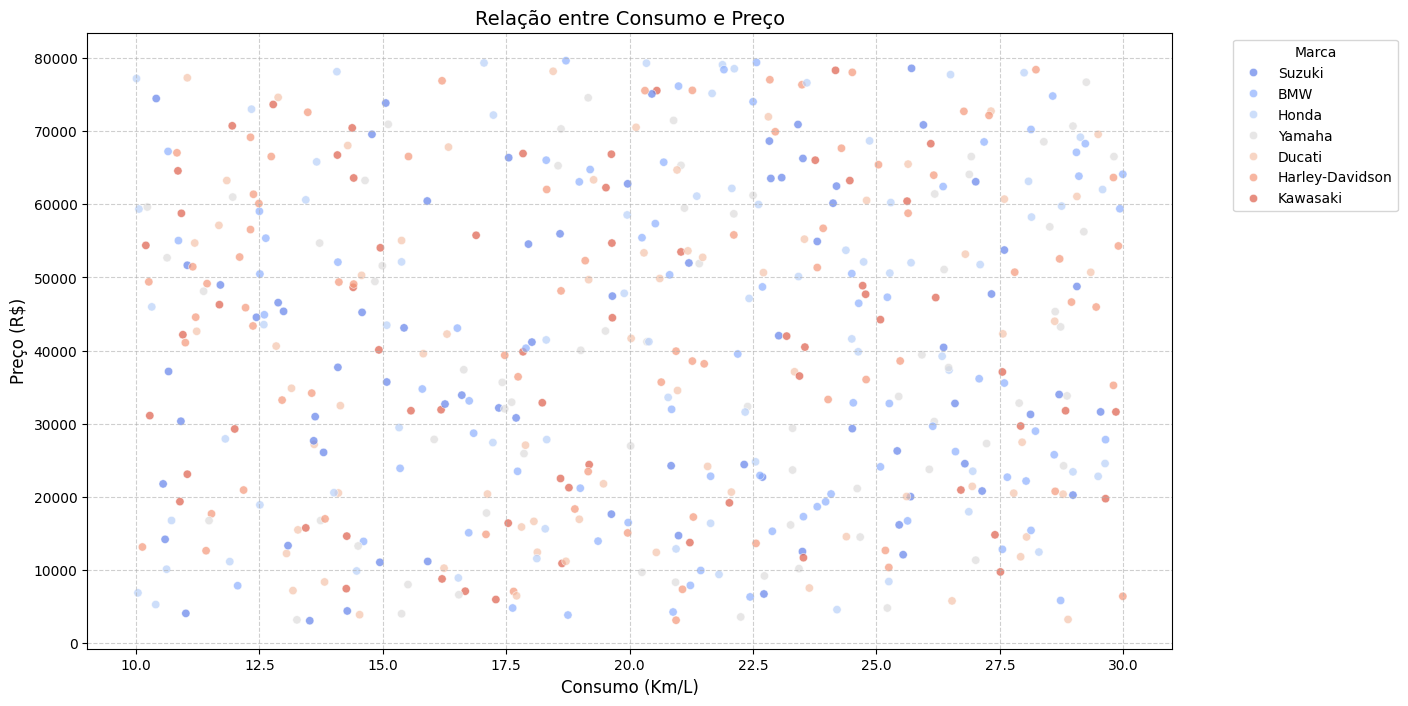

In [25]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Consumo (Km/L)', y='Preço (R$)', hue='Marca', data=dados, palette='coolwarm', alpha=0.7)
plt.title('Relação entre Consumo e Preço', fontsize=14)
plt.xlabel('Consumo (Km/L)', fontsize=12)
plt.ylabel('Preço (R$)', fontsize=12)
plt.legend(title='Marca', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#Criando um Modelo de Regressão Linear

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
X = dados[['Quilometragem (Km)']]
y = dados['Preço (R$)']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = modelo.predict(X_test)

In [31]:
print("\nAvaliação do Modelo de Regressão Linear:")
print(f"Erro Quadrado Médio: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coeficiente de Determinação (R²): {r2_score(y_test, y_pred):.2f}")


Avaliação do Modelo de Regressão Linear:
Erro Quadrado Médio: 394924512.86
Coeficiente de Determinação (R²): -0.02


#Visualizando a Linha de Regressão

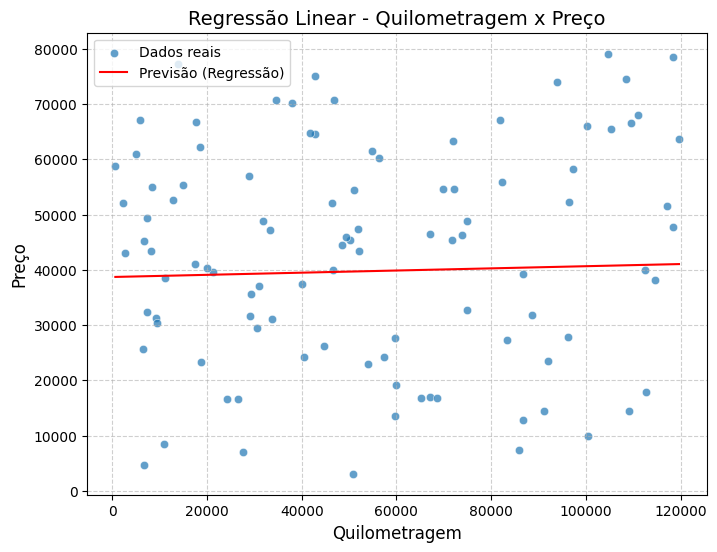

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['Quilometragem (Km)'], y=y_test, label="Dados reais", alpha=0.7)
sns.lineplot(x=X_test['Quilometragem (Km)'], y=y_pred, color="red", label="Previsão (Regressão)")
plt.title("Regressão Linear - Quilometragem x Preço", fontsize=14)
plt.xlabel("Quilometragem", fontsize=12)
plt.ylabel("Preço", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#Análise Temporal

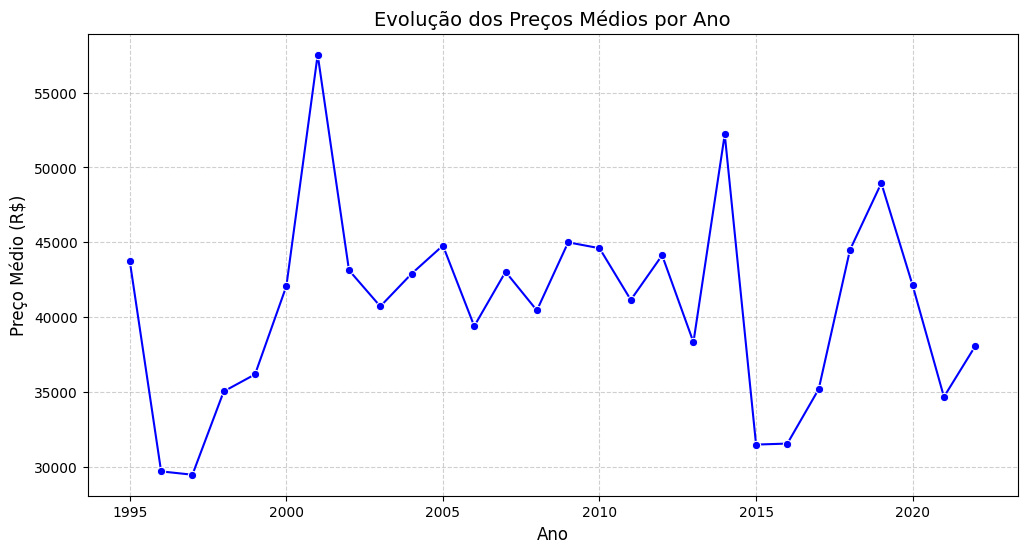

In [33]:
preco_por_ano = dados.groupby('Ano')['Preço (R$)'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=preco_por_ano.index, y=preco_por_ano.values, marker='o', color='blue')
plt.title('Evolução dos Preços Médios por Ano', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Preço Médio (R$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
